2602160750_Bryan Orville Audric

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/MyDrive/Dataset/mlr_dat.csv")
print(data)

    Interest_Rate  Unemployment_Rate  Stock_Index_Price
0            2.75                5.3               1464
1            2.50                5.3               1394
2            2.50                5.3               1357
3            2.50                5.3               1293
4            2.50                5.4               1256
5            2.50                5.6               1254
6            2.50                5.5               1234
7            2.25                5.5               1195
8            2.25                5.5               1159
9            2.25                5.6               1167
10           2.00                5.7               1130
11           2.00                5.9               1075
12           2.00                6.0               1047
13           1.75                5.9                965
14           1.75                5.8                943
15           1.75                6.1                958
16           1.75                6.2            

In [ ]:
data.describe()

,Interest_Rate,Unemployment_Rate,Stock_Index_Price
count,24.000000,24.00000,24.000000
mean,2.072917,5.77500,1070.083333
std,0.349527,0.33002,210.735341
min,1.750000,5.30000,704.000000
25%,1.750000,5.50000,928.250000
50%,2.000000,5.85000,1061.000000
75%,2.500000,6.10000,1239.000000
max,2.750000,6.20000,1464.000000


In [ ]:
print("Missing Value: "+str(data.isnull().sum().sum()))

Missing Value: 0


In [ ]:
class LinearRegression:
    def __init__(self,X,Y):
        ones=np.ones(X.shape)
        X=np.append(ones,X,axis=1)
        self.X=X
        self.Y=Y
        self.m=X.shape[0]
        self.n=X.shape[1]
        self.theta=np.random.randn(X.shape[1])

    def computeCostFunction(self):
        h=np.matmul(self.X,self.theta)
        self.J=(1/(2*self.m))*np.sum((h-self.Y)**2)
        return self.J

    def performGradientDescent(self,num_of_iter,alpha):
        self.Cost_history=[]
        self.theta_history=[]
        for x in range(num_of_iter):
            h=np.matmul(self.X,self.theta)
            J=self.computeCostFunction()
            self.Cost_history.append(J)
            self.theta_history.append(self.theta)
            temp=h-self.Y
            self.theta=self.theta-(alpha/self.m)*(self.X.T.dot(temp))
        return self.theta,self.Cost_history,self.theta_history


    def predict(self,X_test,Y_test):
        ones=np.ones(X_test.shape)
        X_test=np.append(ones,X_test,axis=1)
        self.Y_pred=np.matmul(X_test,self.theta)
        self.error_percentage=(abs(self.Y_pred-Y_test)/Y_test)*100
        return self.Y_pred,self.error_percentage

    def predictUsingNormalEquation(self,X_test,Y_test):
        ones=np.ones(X_test.shape)
        X_test=np.append(ones,X_test,axis=1)
        inv=np.linalg.inv(np.matmul(self.X.T,self.X))
        self.w=np.matmul(np.matmul(inv,self.X.T),self.Y)
        y_pred=np.matmul(X_test,self.w)
        return y_pred,(abs(Y_test-y_pred)/Y_test)*100

    def returnTheta(self):
        return self.theta

    def returnX(self):
        return self.X

    def returnY(self):
        return self.Y


Splitting and Shuffling the dataset

In [ ]:
#shuffle the dataset
data=data.sample(frac=1)
x=data[['Interest_Rate','Unemployment_Rate']]
y=data['Stock_Index_Price']

x_values = x.values
y_values = y.values
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_values,y_values,test_size = 0.3)

Gradient Descent

In [ ]:
LR = LinearRegression(x_values,y_values)
num_of_iterations = 1000
learning_rate = 0.05
theta_grad, cost_history,_ = LR.performGradientDescent(num_of_iterations,learning_rate)

print("Intercept:",theta_grad[-1])
print("Coefficient:",theta_grad[:-1])

#Train
y_pred_gradient, error_gradient = LR.predict(x_train,y_train)

Intercept: -36.684477593339054
Coefficient: [ 80.78431063  81.66197331 539.86444192]


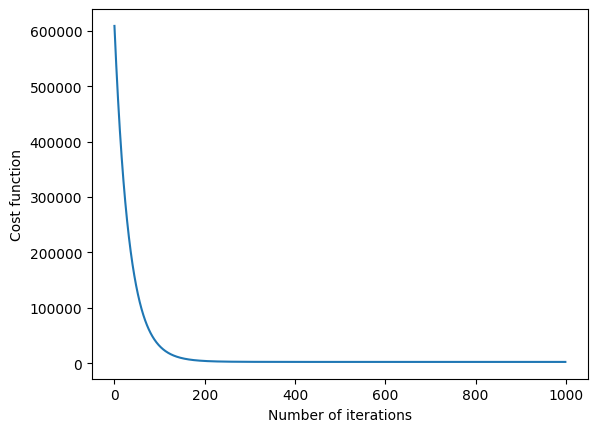

In [ ]:
#plot of how cost function is minimized as number of iterations is proceeded
import matplotlib.pyplot as plt
x_plot=[i for i in range(1000)]
plt.plot(x_plot,cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.show()

Analytic Method

In [ ]:
x_b = x
x_b['Intercept'] = 1

from sklearn.model_selection import train_test_split
x_b_train, x_b_test, y_b_train, y_b_test = train_test_split(x_b,y,test_size = 0.3)
def NormalEquation(x,y):
  return np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

theta_analytic = NormalEquation(x_b,y)

print("Intercept:",theta_analytic[-1])
print("Coefficient:",theta_analytic[:-1])

#Train
y_pred_train_analytic = np.dot(x_b_train,theta_analytic)

Intercept: 1798.4039776225836
Coefficient: [ 345.54008701 -250.14657137]


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

sklearn_model = LinearRegression()
sklearn_model.fit(x_values,y_values)

print("Intercept:",sklearn_model.intercept_)
print("Coefficient:",sklearn_model.coef_)


#Train
y_pred_sklearn = sklearn_model.predict(x_train)

Intercept: 1798.4039776258546
Coefficient: [ 345.54008701 -250.14657137]


Prediction

In [ ]:
#Gradient Descent
y_test_predict_gradient,_ = LR.predict(x_test,y_test)

#Analytic Method
y_test_predict_analytic = np.dot(x_b_test,theta_analytic)

#Sklearn Linear Regression
y_test_predict_sklearn_linear_regression = sklearn_model.predict(x_test)

#R^2 Score for each method
from sklearn.metrics import r2_score


print("R^2 Score for Gradient Descent:"+str(r2_score(y_test,y_test_predict_gradient)*100)+"%")
print("R^2 Score for Analytic Method: "+str(r2_score(y_b_test,y_test_predict_analytic)*100)+"%")
print("R^2 Score for Sklearn Linear Regression: "+str(r2_score(y_test,y_test_predict_sklearn_linear_regression)*100)+"%")

R^2 Score for Gradient Descent:88.22924016640152%
R^2 Score for Analytic Method: 87.606574706089%
R^2 Score for Sklearn Linear Regression: 88.8551501045158%


Each method has approximately similar R^2 Score with 87% to 88%